In [4]:
import captum
from torch.utils.data import DataLoader
from tqdm import tqdm

import matplotlib.pyplot as plt

In [59]:
from models import *
from data import get_dataloaders, trace_sample
import torch
from importlib import reload


LOAD_EXPERIMENT = "fixslice-sbox2-byte1-zhang-0_1000"
LOAD_EPOCH = 30

device = torch.device("cuda")

sbox_model = torch.load(f"models/{LOAD_EXPERIMENT}/epoch{LOAD_EPOCH}.pt")
sbox_model.to(device)

_, _, test_loader = get_dataloaders(
    200,
    "sbox2",
    1,
    0,
    1000,
)


C:\Users\Ulrik\AppData\Local\Temp\ipykernel_24996\1520427783.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sbox_model = torch.load(f"models/{LOAD_EXPERIMENT}/epoch{LO

In [60]:
def sbox_gradient_based_attribution(model : nn.Module, val_loader : DataLoader):
    grads = 0.

    # trace, plaintext, key
    for traces, _, key in tqdm(val_loader, 'computing gradients'):

        traces : torch.Tensor = traces.to(device)

        # Set up gradient computation in computational graph
        traces.requires_grad = True
        traces.retain_grad()

        output = model(traces.squeeze())

        correct_idx = int(key)

        # Backward on magnitude sum of correct prediction
        output[correct_idx].sum().backward()

        grads += traces.grad\
            .squeeze()\
            .abs()\
            .mean(dim=0)

    return grads

In [61]:
SBOX = [
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16,
]

In [62]:
sample = test_loader.__iter__().__next__()
trace, plaintexts, key = sample # sbox
#trace, key = sample # key

In [63]:
print(trace.shape)
print(plaintexts.shape)

torch.Size([1, 500, 1000])
torch.Size([1, 500, 2])


In [64]:
trace = trace[:, 0, :]
plaintexts = plaintexts[:, 0, :].squeeze()
key = key.item()

print(trace.shape)
#print(plaintexts.shape)

torch.Size([1, 1000])


In [65]:
sbox1 = SBOX[int(plaintexts[0]) ^ int(key)]
sbox2 = SBOX[int(plaintexts[1]) ^ int(key)]

In [50]:
output = sbox_model(trace.to(device))
output.shape

torch.Size([1, 256])

In [51]:
from captum.attr._utils.lrp_rules import EpsilonRule, GammaRule, Alpha1_Beta0_Rule, PropagationRule
from captum.attr import LRP

In [66]:
layer_lrp = captum.attr.LRP(sbox_model)

for mod in sbox_model.modules():
    mod.rule = EpsilonRule()

attr = layer_lrp.attribute(trace.to(device), target=int(key)).squeeze()
    
np_attr = attr.squeeze().detach().cpu().numpy()
np_abs_attr = attr.abs().squeeze().detach().cpu().numpy()

c:\Users\Ulrik\.conda\envs\INF265\Lib\site-packages\captum\attr\_core\lrp.py:207: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  gradient_mask = apply_gradient_requirements(input_tuple)


In [69]:
layer_lrp = captum.attr.LRP(sbox_model)

total_attr = torch.zeros(1000)
total_abs_attr = torch.zeros(1000)

for trace, plaintexts, key in test_loader:
    for mod in sbox_model.modules():
        mod.rule = GammaRule()

    trace = trace[:, 0, :]
    plaintexts = plaintexts[:, 0, :].squeeze()
    key = key.item()

    sbox1 = SBOX[int(plaintexts[0]) ^ int(key)]
    sbox2 = SBOX[int(plaintexts[1]) ^ int(key)]

    attr = layer_lrp.attribute(trace.to(device), target=sbox2).squeeze()
    
    np_attr = attr.squeeze().detach().cpu().numpy()
    np_abs_attr = attr.abs().squeeze().detach().cpu().numpy()

    total_attr += np_attr
    total_abs_attr += np_abs_attr

avg_attr = total_attr / len(test_loader)
avg_abs_attr = total_abs_attr / len(test_loader)


c:\Users\Ulrik\.conda\envs\INF265\Lib\site-packages\captum\attr\_core\lrp.py:207: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  gradient_mask = apply_gradient_requirements(input_tuple)


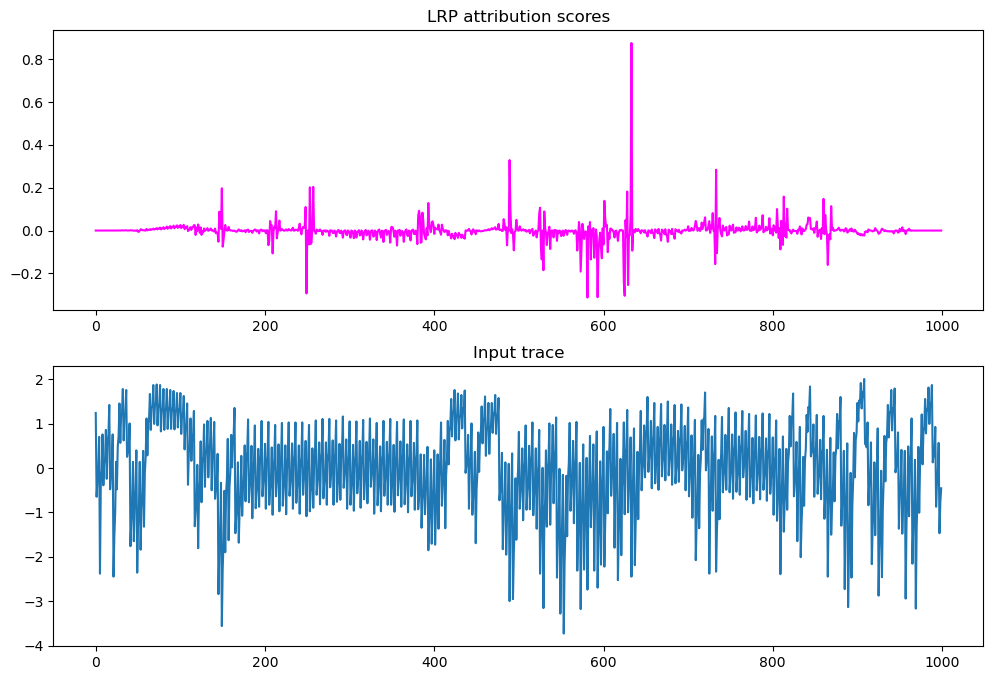

In [70]:
fig, axs = plt.subplots(nrows=2, ncols=1)
fig.set_figheight(8.0)
fig.set_figwidth(12.0)

axs[0].plot(attr.detach().cpu(), 'magenta')
#axs[1].plot(avg_abs_attr, 'purple')
axs[1].plot(trace[0].cpu())

axs[0].set_title("LRP attribution scores")
#axs[1].set_title("Abs LRP")
axs[1].set_title("Input trace")

plt.show()

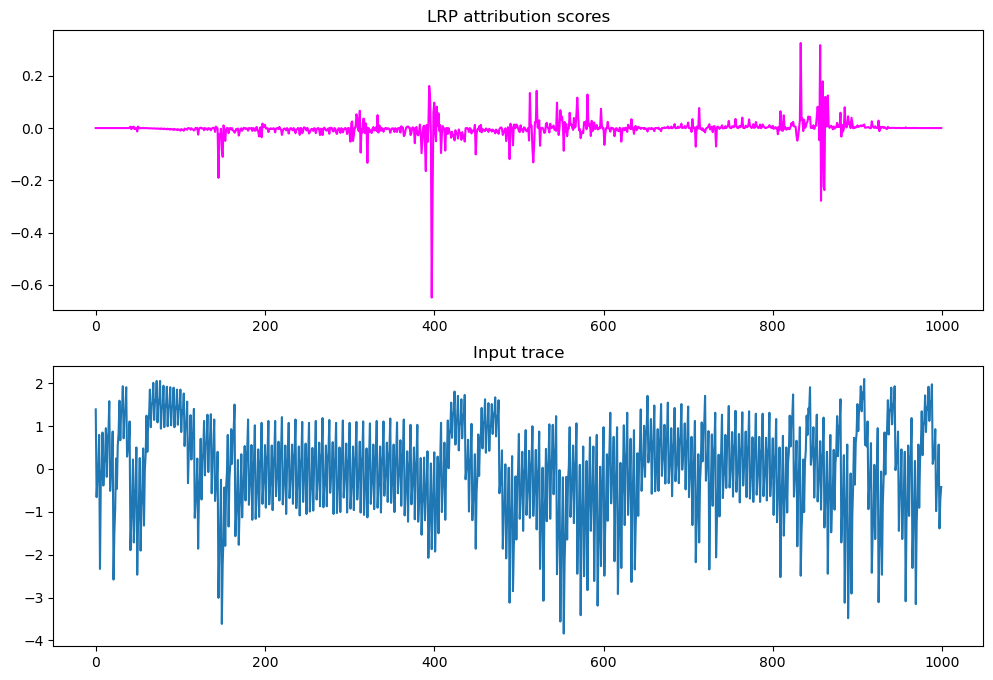

In [58]:
fig, axs = plt.subplots(nrows=2, ncols=1)
fig.set_figheight(8.0)
fig.set_figwidth(12.0)

axs[0].plot(attr.detach().cpu(), 'magenta')
#axs[1].plot(avg_abs_attr, 'purple')
axs[1].plot(trace[0].cpu())

axs[0].set_title("LRP attribution scores")
#axs[1].set_title("Abs LRP")
axs[1].set_title("Input trace")

plt.show()

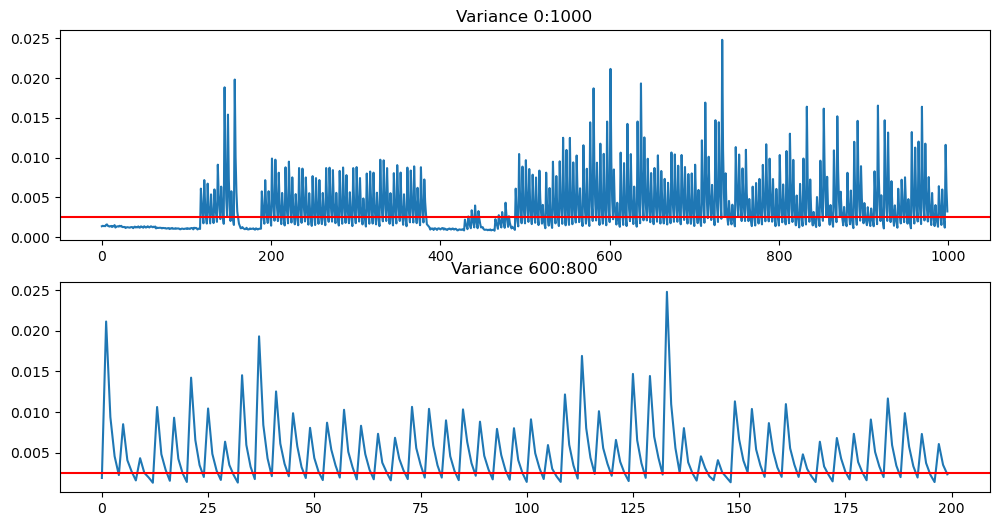

In [23]:
sample = test_loader.__iter__().__next__()
traces, _, _ = sample

variance = traces.var(1).squeeze()

fig, axs = plt.subplots(nrows=2, ncols=1)
fig.set_figheight(6.0)
fig.set_figwidth(12.0)

axs[0].plot(variance)
axs[1].plot(variance[600:800])

axs[0].axhline(y=0.0025, color='r', linestyle='-')
axs[1].axhline(y=0.0025, color='r', linestyle='-')

axs[0].set_title("Variance 0:1000")
axs[1].set_title("Variance 600:800")

plt.show()